# Аппроксимация функций

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

%matplotlib inline

In [2]:
np.random.seed(42)

In [3]:
n = 3      # степень аппроксимационного полинома
count = 5  # кол-во точек

$ f(x) = x \tan x $

In [4]:
def f(x):
    return x * np.tan(x)

In [5]:
eps = 0.2  # погрешность

x_known = np.linspace(-1, 1, count)
y_known = f(x_known) + (np.random.rand(count) * 2*eps - eps)

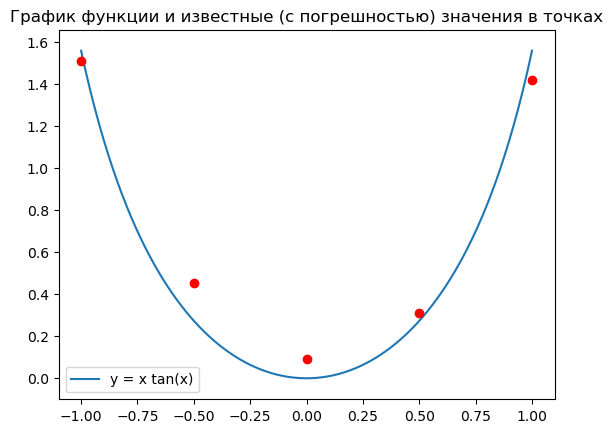

In [6]:
X = np.linspace(-1, 1, 100)
Y = f(X)
y_lim = np.min(Y)-0.1, np.max(Y)+0.1

plt.plot(X, Y, label='y = x tan(x)')
# plt.plot(X, np.vectorize(f_known)(X), label='y = x tan(x)')

for xi, yi in zip(x_known, y_known):
    plt.plot(xi, yi, 'ro')

plt.title('График функции и известные (с погрешностью) значения в точках')
plt.ylim(y_lim)
_ = plt.legend()

In [7]:
def get_poly(coefs: np.ndarray):
    
    def poly(x):
        s = 0
        
        for deg in range(len(coefs)):
            s += coefs[deg] * x**deg
        
        return s
    
    return poly

## МНК

In [8]:
Q = np.zeros((count, n + 1))

for deg in range(n + 1):
    Q[:, deg] = x_known**deg
    
H = Q.T @ Q
b = Q.T @ y_known.T
a = np.linalg.inv(H) @ b 

P_mnk = get_poly(a)

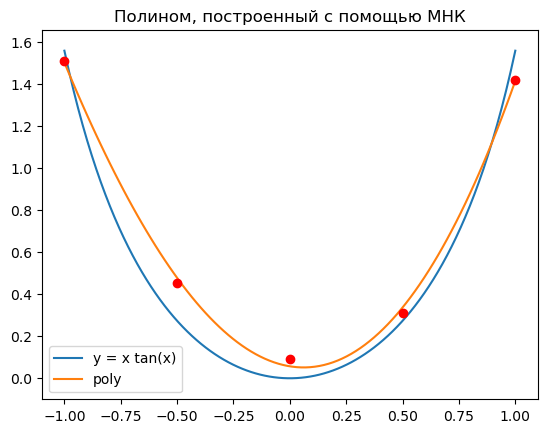

In [9]:
X = np.linspace(-1, 1, 100)

plt.plot(X, f(X), label='y = x tan(x)')
plt.plot(X, P_mnk(X), label='poly')

for xi, yi in zip(x_known, y_known):
    plt.plot(xi, yi, 'ro')

plt.title('Полином, построенный с помощью МНК')
plt.ylim(y_lim)
_ = plt.legend()

### Посчитаем cреднюю ошибку: 

$ Error_f(g) = \frac{1}{b - a} \int_{a}^{b} { |f(x) - g(x)| dx } $, где g(x) - аппроксимация f(x)

In [10]:
quad(lambda x: abs(f(x) - P_mnk(x)), -1, 1)[0]

0.20574931715196815

## Алгебраические полиномы

In [11]:
m = []
for k in range(n + 1):
    m.append(quad(lambda x, k: f(x) * x**k, -1, 1, args=(k))[0])
    
s = []
for k in range(2*n + 1):
    s.append(quad(lambda x, k: x**k, -1, 1, args=(k))[0])
    
S = np.zeros((n+1, n+1))
for i in range(n+1):
    S[i, :] = s[i:i + n+1]
    
a = np.linalg.inv(S) @ m

P_integ = get_poly(a)

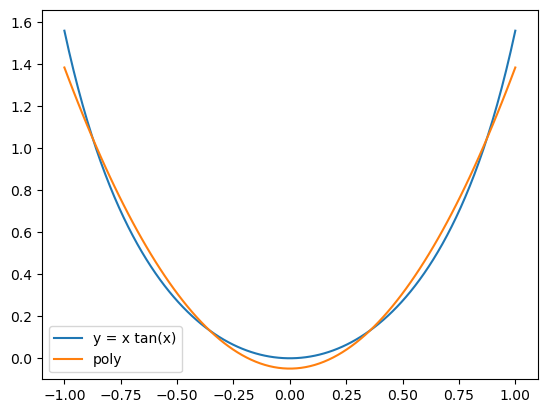

In [12]:
X = np.linspace(-1, 1, 100)

plt.plot(X, f(X), label='y = x tan(x)')
plt.plot(X, P_integ(X), label='poly')

plt.ylim(y_lim)
_ = plt.legend()

In [13]:
quad(lambda x: abs(f(x) - P_integ(x)), -1, 1)[0]

0.0827796476835753

## Полиномы Лежандра

In [14]:
from math import factorial as fact


def lezh(x, k):
    lk = 1 / (2**k * fact(k))
    
    if k == 0:
        return 1
    elif k == 1 :
        return x
    elif k == 2:
        return lk * (12*x**2 - 4)
    elif k == 3:
        return lk * 24*x*(3 - 5*x**2)
    elif k == 4:
        return lk * 48*(35*x**4 - 30*x**2 + 3)
    elif k == 5:
        return lk * (-480)*(63*x**4 - 70*x**2 + 15)
    elif k == 6:
        return lk * 2880*(231*x**6 - 315*x**4 + 105*x**2 - 5)
    
    return None

In [15]:
def get_lezh_poly(coefs):
    
    def poly(x):
        res = 0
        
        for deg, c in enumerate(coefs):
            res += c * lezh(x, deg)
        
        return res
    
    return poly

In [16]:
a = []
for k in range(n + 1):
    v1 = quad(lambda x, k: f(x) * lezh(x, k), -1, 1, args=(k))[0]
    v2 = quad(lambda x, k: lezh(x, k)**2, -1, 1, args=(k))[0]
    a.append(v1 / v2)

P_integ = get_lezh_poly(a)

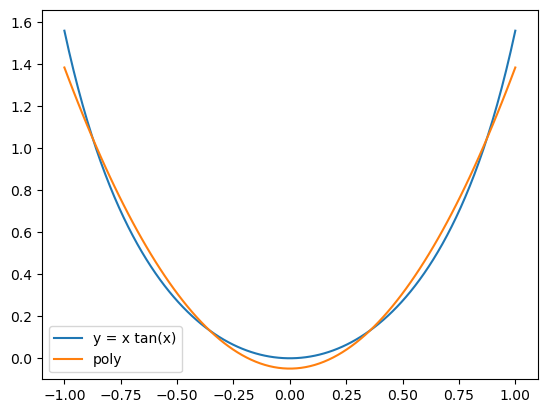

In [17]:
X = np.linspace(-1, 1, 100)

plt.plot(X, f(X), label='y = x tan(x)')
plt.plot(X, P_integ(X), label='poly')

plt.ylim(y_lim)
_ = plt.legend()

In [18]:
quad(lambda x: abs(f(x) - P_integ(x)), -1, 1)[0]

0.08277964768357464